In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np

In [108]:
data =pd.read_csv("loan.csv")

In [109]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [110]:
data.shape

(614, 13)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [112]:
data.duplicated().sum()

0

In [113]:
data.drop(columns="Loan_ID",axis=1,inplace=True)

In [114]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [115]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [116]:
data.dropna(inplace=True)

In [117]:
lbEncoder = LabelEncoder()
colName = data.select_dtypes(include="object").columns
for i in colName:
    data[i] = lbEncoder.fit_transform(data[i])

In [118]:
data = data.replace(to_replace="3+",value=4)

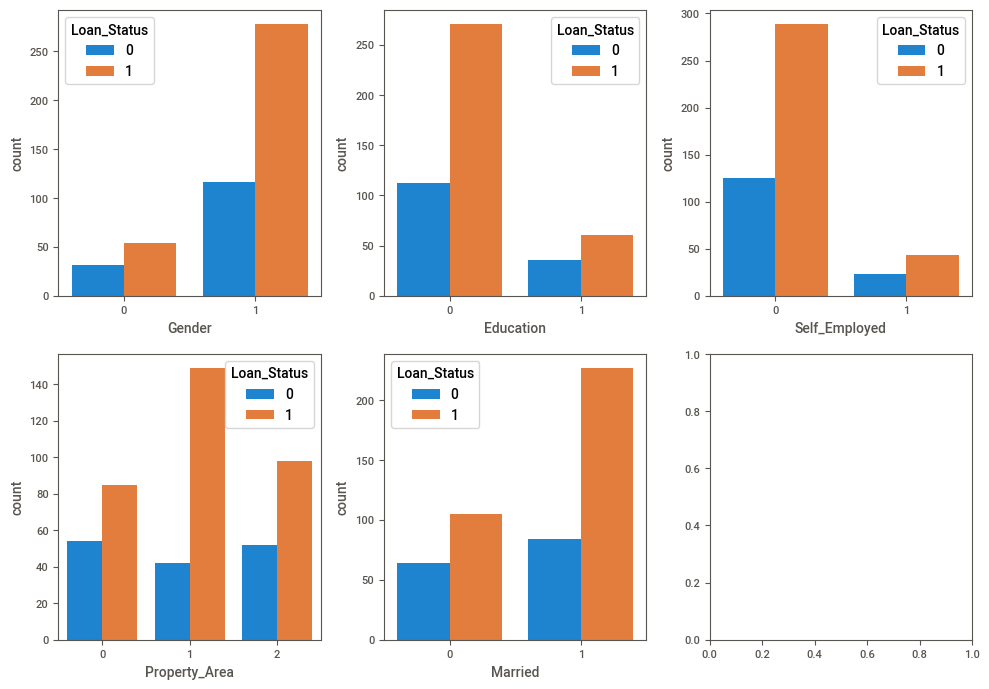

In [119]:
fig, axes = plt.subplots(2,3,figsize= (10,7))

sns.countplot(x=data["Gender"],hue="Loan_Status",data=data ,ax=axes[0,0])
sns.countplot(x=data["Education"],hue="Loan_Status",data=data,ax=axes[0,1])
sns.countplot(x=data["Self_Employed"],hue="Loan_Status",data=data,ax=axes[0,2])
sns.countplot(x=data["Property_Area"],hue="Loan_Status",data=data,ax=axes[1,0])
sns.countplot(x=data["Married"],hue="Loan_Status",data=data,ax=axes[1,1])
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Married'}>,
        <Axes: title={'center': 'Dependents'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Self_Employed'}>,
        <Axes: title={'center': 'ApplicantIncome'}>],
       [<Axes: title={'center': 'CoapplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>,
        <Axes: title={'center': 'Property_Area'}>,
        <Axes: title={'center': 'Loan_Status'}>]], dtype=object)

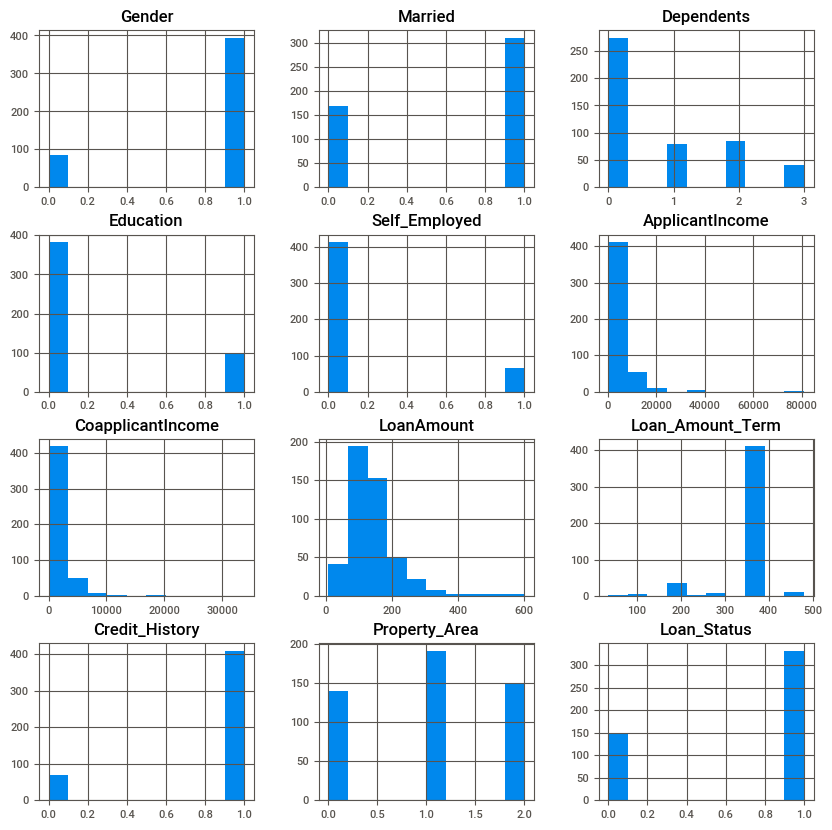

In [121]:
data.hist(figsize=(10,10))

In [72]:
report.show_html("view.html")

Report view.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [122]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [166]:
X = data.drop(columns="Loan_Status",axis=1)
Y =data["Loan_Status"]

In [169]:
XTR,XTS,YTR,YTS = train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [170]:
model =svm.SVC(kernel='linear')

In [171]:
model.fit(XTR,YTR)

SVC(kernel='linear')

In [172]:
PR = model.predict(XTR)

In [173]:
model.score(XTR,YTR)*100

79.42708333333334

In [175]:
accuracy_score(PR,YTR)

0.7942708333333334

In [165]:
# making prediction
input =(1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2)
vl = np.asarray(input).reshape(1,-1)
print(input)
predic =model.predict(vl)
if predic==0:
    print("false")
else:
    print("pass")

(1, 1, 2, 0, 1, 5417, 4196.0, 267.0, 360.0, 1.0, 2)
pass


C:\Users\10713310\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
